### Import Libraries

In [8]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Useful Functions

In [9]:
parent_directory = os.path.join(os.environ["BLACK_BOX"])
validations_path = os.path.join(parent_directory, "experiments/results/validation_checkpoints")
sys.path.append(parent_directory)

from experiments.utils.validation_utils import extract_results_csv

### Get Algorithm Paths

In [122]:
# validation algorithm resultant folders located in ./experiments/results/validation_checkpoints folder
folder_name_1 = "ce_search_PPOTrainer_highway_environment:highway-environment-v0_2022-07-20_19-07-188iuhdqyw_Agent3_Chkpt200"

### Read Algorithm Results

In [123]:
# read results.csv file inside given validation folder
df_1 = extract_results_csv(os.path.join(validations_path, "again/" + folder_name_1, "results.csv"))

### Print General Statistics

In [124]:
n_samples = df_1.shape[0]
print("Number of Samples :\t", df_1.shape)

n_collisions = df_1["collision"].value_counts()[True]
print("Number of Collisions :\t", n_collisions)

Number of Samples :	 (8192, 17)
Number of Collisions :	 4820


### Scatter Plots

In [125]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

colormap = plt.cm.gist_ncar # nipy_spectral, Set1, Paired   
colors = [colormap(i) for i in np.linspace(0, 1, n_samples)]

text = "#samples\n" + str(n_samples) + "\n\n#collisions\n" + str(n_collisions)

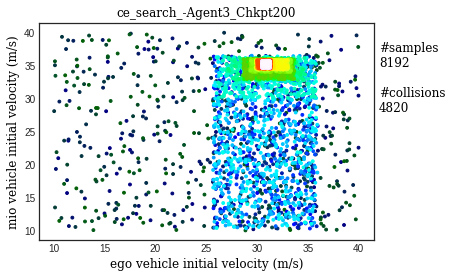

In [126]:
title_name = folder_name_1[:10] + "-" + folder_name_1[-15:]

plt.style.use("seaborn-white")
plt.scatter(x=df_1["config.ego_v1"], y=df_1["config.front_v1"], c=colors, marker="o", s=8)
plt.text(42, 28, text, fontdict=font)

plt.title(title_name, fontdict=font)
plt.xlabel("ego vehicle initial velocity (m/s)", fontdict=font)
plt.ylabel("mio vehicle initial velocity (m/s)", fontdict=font)

save_name = "ego_vehicle"
plt.savefig(title_name + "_" + save_name + ".png", dpi=300, bbox_inches="tight")

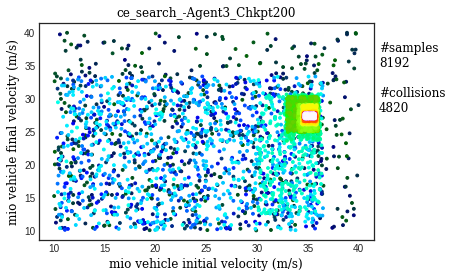

In [127]:
title_name = folder_name_1[:10] + "-" + folder_name_1[-15:]

plt.style.use("seaborn-white")
plt.scatter(x=df_1["config.front_v1"], y=df_1["config.front_v2"], c=colors, marker="o", s=8)
plt.text(42, 28, text, fontdict=font)

plt.title(title_name, fontdict=font)
plt.xlabel("mio vehicle initial velocity (m/s)", fontdict=font)
plt.ylabel("mio vehicle final velocity (m/s)", fontdict=font)

save_name = "mio_vehicle"
plt.savefig(title_name + "_" + save_name + ".png", dpi=300, bbox_inches="tight")

### Probability Plots

In [19]:
n_samples = df_1.shape[0]
mean_scale = np.logspace(-3, 1, n_samples)

In [20]:
df_1_probability = np.zeros(n_samples)

for i in range(n_samples):
    df_1_reward_scaled = df_1[df_1["reward"].between(0, mean_scale[i])]
    df_1_probability[i] = df_1_reward_scaled.shape[0] / len(df_1)

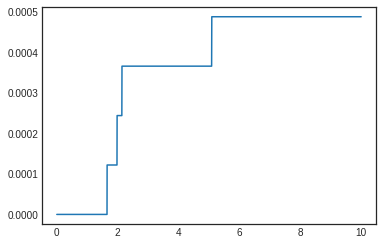

In [21]:
plt.plot(mean_scale, df_1_probability, label=title_name)